In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clones.data.experiments import Experiment
from clones.annotation.bayesian import BayesianClassifier
from clones.annotation.model_selection import ModelSelection

%matplotlib inline

# Load stack and aggregate measurements

In [43]:
experiment_path = '/Users/Sebi/Documents/grad_school/research/ratio/data/published/clones/yanE833/'

# load experiment
experiment = Experiment(experiment_path)

# initialize stack
stack_id = 15
stack = experiment.load_stack(experiment.stack_ids[stack_id], full=True)

# aggregate measurement data
measurements = stack.aggregate_measurements(raw=False)

In [44]:
# filter measurement data
data = measurements
data = data[data.selected]
#data = data[data.b.between(*np.percentile(data.b.values, [0, 100]))]

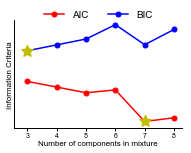

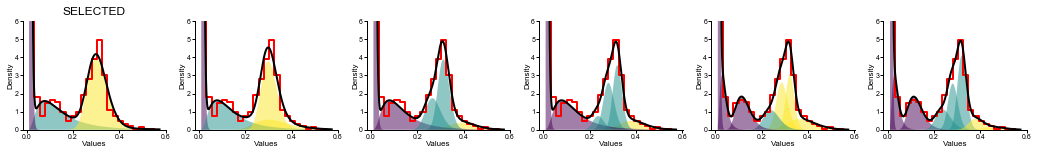

In [45]:
# fit model to measurement data
classify_on = 'r'
selector = ModelSelection(data[classify_on].values, classify_on=classify_on, max_num_components=8)
selector.plot_information_criteria()
selector.plot_models(ymax=6)

In [46]:
classifier = selector.BIC_optimal

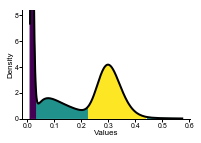

In [47]:
classifier.plot_pdf()

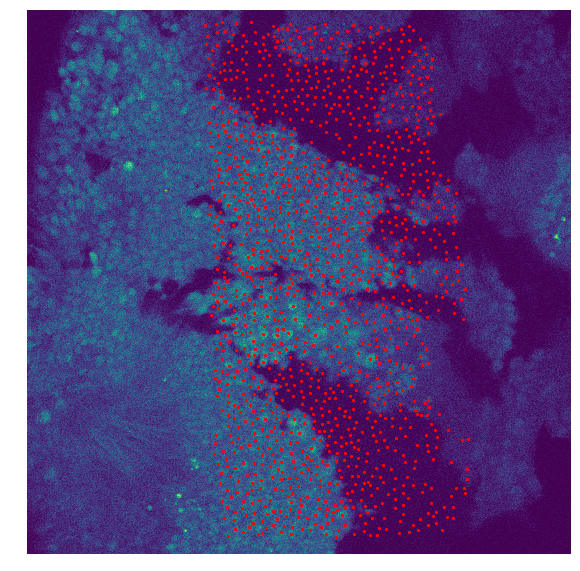

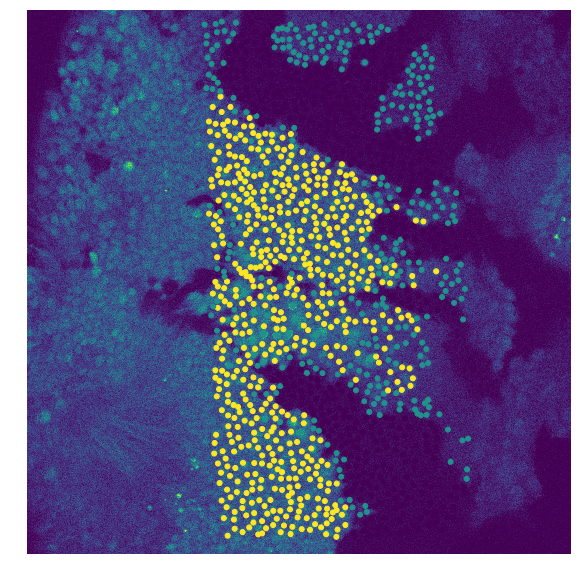

In [48]:
layer_id = 0
layer = stack[layer_id]

layer_data = data[data.layer==layer_id]
layer_pts = layer_data[['centroid_x', 'centroid_y']].values

fig0 = layer.get_channel('r').show(segments=False)
fig1 = layer.get_channel('r').show(segments=False)

ax0 = fig0.axes[0]
ax0.scatter(*layer_pts.T, s=5, c='r')
ax1 = fig1.axes[0]

genotypes = classifier(layer_data)
ax1.scatter(*layer_pts.T, s=25, c=genotypes)

In [319]:
ch = layer.get_channel('r')

In [321]:
px = ch.im.ravel()

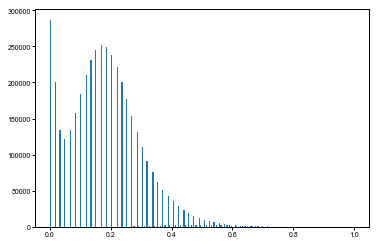

In [327]:
_ = plt.hist(px, bins=np.linspace(0, 1, 2**8))

In [323]:
import matplotlib.pyplot as plt

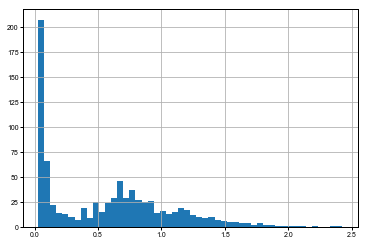

In [137]:
_ = layer_data.r_normalized.hist(bins=50)

In [174]:
from pomegranate import GeneralMixtureModel, LogNormalDistribution, PoissonDistribution, GammaDistribution

In [202]:
class GammaClassifier(BayesianClassifier):
    @staticmethod
    def _fit(values, n=3):
        """
        Fit log-normal mixture model using likelihood maximization.

        Args:

            values (np.ndarray[float]) - 1D array of values

            n (int) - number of log-normal distributions

        Returns:

            model (pomegranate.GeneralMixtureModel)

        """
        x = values.reshape(-1, 1)
        args = (GammaDistribution, n, x)
        kwargs = dict(n_init=1000)
        return GeneralMixtureModel.from_samples(*args, **kwargs)

([array([5., 8., 5., 9., 3., 3., 4., 2., 7., 4.]),
  array([3., 6., 9., 2., 4., 6., 8., 6., 3., 3.]),
  array([10.,  8., 12.,  8., 17., 14.,  9.,  4.,  8., 10.])],
 array([0.00357573, 0.10258446, 0.20159319, 0.30060192, 0.39961065,
        0.49861937, 0.5976281 , 0.69663683, 0.79564556, 0.89465429,
        0.99366302]),
 <a list of 3 Lists of Patches objects>)

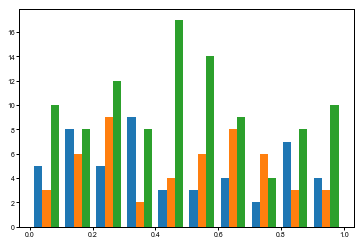

In [211]:
plt.hist([np.random.random(50), np.random.random(50), np.random.random(100)])

In [34]:
#pts = measurements[['centroid_x', 'centroid_y']].values



In [70]:
import numpy as np

In [86]:
data = measurements[measurements.selected]

# Fit cell classifier

In [57]:
# define groups (dictionary of {cluster_id: group_id} pairs)
groups = {0:0, 1:1, 2:1, 3:1, 4:2, 5:2} # e.g. 6 clusters --> 3 groups

# fit classifier
classifier = CellClassifier.from_measurements(measurements, classify_on='r_normalized', groups=groups, log=False)

# Visualize classifier

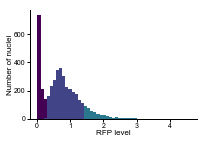

In [58]:
classifier.show()

In [88]:
from clones.annotation.bayesian import BayesianClassifier

In [89]:
bayesian_classifier = BayesianClassifier(x.r_normalized.values, classify_on='r')

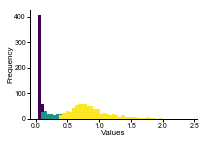

In [90]:
bayesian_classifier.show()

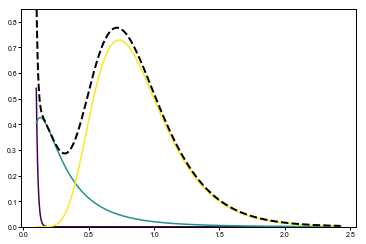

In [91]:
bayesian_classifier.show_pdf()

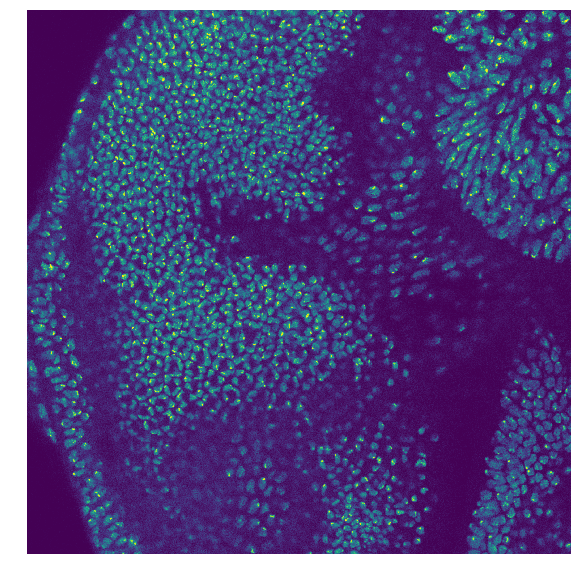

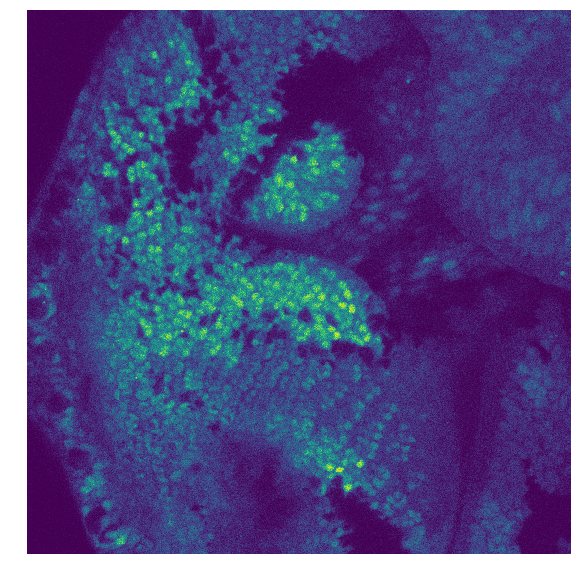

In [55]:
layer=stack[3]
_ = layer.get_channel('b').show(segments=False)
_ = layer.get_channel('r').show(segments=False)



In [ ]:
"""
TODO:

1. make sure only "included" measurements are being passed to classifier
2. check that low-DAPI cells (bleeding from other layers) arent screwing things up
3.

"""

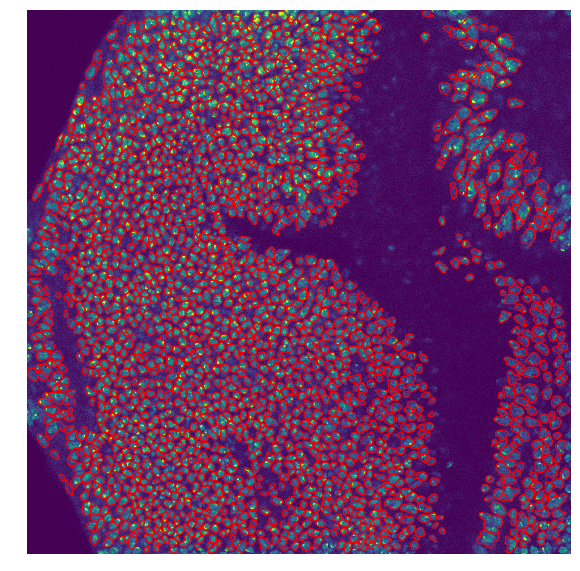

In [70]:
_ = layer.get_channel('b').show(segments=True)